In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Deep Neural Networks 
## Session 15c - Lecture

### Using artificial data

## Sequential Modeling Regression
</p><img src='../../images/prasami_color_tutorials_small.png' style = 'width:400px;' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

In [2]:
# import statements
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

import tensorflow as tf

In [3]:
inpDir = '../input'
outDir = '../output'
RANDOM_STATE = 24

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
 
tf.random.set_seed(RANDOM_STATE) # setting for Tensorflow as well

EPOCHS = 100

BATCH_SIZE = 64
# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (12,9),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }

plt.rcParams.update(params) # update rcParams

In [4]:
physical_devices = tf.config.list_physical_devices('GPU') 

if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-12-09 13:04:01.895164: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 13:04:01.910131: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 13:04:01.910304: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## Create Some Regression data

In [5]:
start = -2.1
end = 2.1

### Training data

delta = 0.0005

X_train = np.arange(start, end+ delta,delta)

y_rnd = np.random.rand(X_train.shape[0]) - 0.5

y_true =   2* np.square(X_train) + 2 * np.sin(np.pi*X_train)

y_train = y_true + y_rnd* 2

### Test data
X_test = np.arange(start, end+ delta, delta * 10 )

y_rnd = np.random.rand(X_test.shape[0])- 0.5

y_true_test =   2* np.square(X_test) + 2 * np.sin(np.pi*X_test)

y_test = y_true_test  + y_rnd* 2

In [6]:
X_train.shape

(8401,)

In [7]:
4201/64

65.640625

In [8]:
num_examples = BATCH_SIZE * 64

X_train = X_train[:num_examples]

y_train = y_train[:num_examples]

y_true = y_true[:num_examples]

In [9]:
X_train.shape

(4096,)

In [10]:
X_train.max(), X_test.max()

(-0.052499999999316316, 2.0999999999999104)

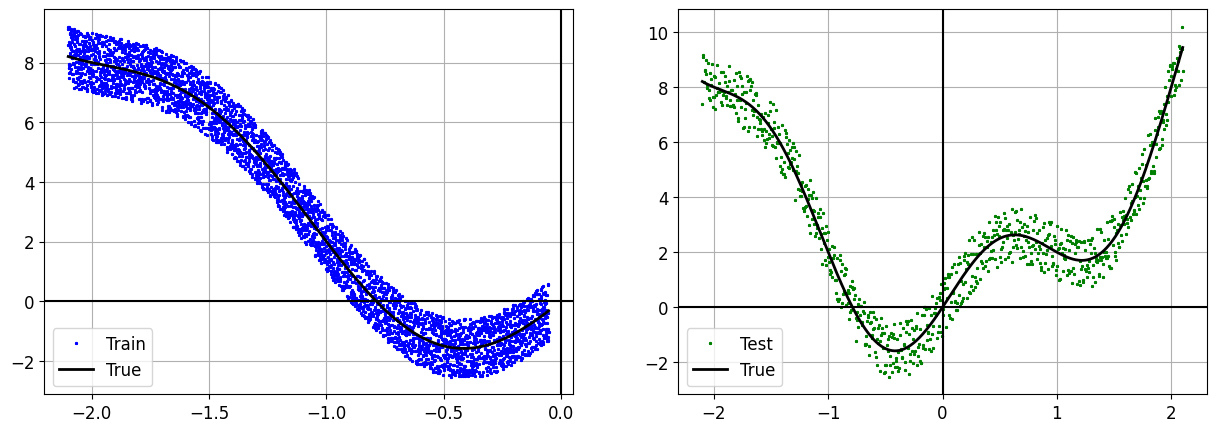

In [11]:
start = -2
end = 2
delta_train = 0.01

fig, axes = plt.subplots(1, 2, figsize =(15,5))

ax = axes[0]
ax.plot(X_train, y_train, 'b*', markersize=2, label = 'Train')
ax.plot(X_train,  y_true, c = 'k', linewidth=2, label = 'True')
ax.axhline(0, c = 'k')
ax.axvline(0, c = 'k')
ax.grid()
ax.legend()

ax = axes[1]
ax.plot(X_test, y_test, 'g*', markersize=2, label = 'Test')
ax.plot(X_test,  y_true_test, c = 'k', linewidth=2, label = 'True')
ax.axhline(0, c = 'k')
ax.axvline(0, c = 'k')
ax.grid()
ax.legend();

In [12]:
num_features = 1

model = tf.keras.Sequential()

model.add ( tf.keras.layers.Dense(128, activation = 'swish', input_shape = (num_features,) ) )

model.add ( tf.keras.layers.Dense(64, activation = 'swish' ) )


model.add( tf.keras.layers.Dense(1) )

2022-12-09 13:04:02.199696: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 13:04:02.200313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 13:04:02.200490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 13:04:02.200604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [13]:
model.compile (optimizer='adam', loss = 'mse')

In [14]:
model.fit (X_train, y_train,
          validation_data=[X_test, y_test],
          batch_size = BATCH_SIZE,
          epochs=EPOCHS,
          verbose = 2)

Epoch 1/100
64/64 - 1s - loss: 11.0422 - val_loss: 21.2912 - 870ms/epoch - 14ms/step
Epoch 2/100


2022-12-09 13:04:03.284963: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


64/64 - 0s - loss: 3.3262 - val_loss: 27.3970 - 71ms/epoch - 1ms/step
Epoch 3/100
64/64 - 0s - loss: 1.3763 - val_loss: 38.6134 - 66ms/epoch - 1ms/step
Epoch 4/100
64/64 - 0s - loss: 1.1213 - val_loss: 39.5396 - 62ms/epoch - 965us/step
Epoch 5/100
64/64 - 0s - loss: 1.1179 - val_loss: 39.5674 - 63ms/epoch - 978us/step
Epoch 6/100
64/64 - 0s - loss: 1.1234 - val_loss: 38.3349 - 65ms/epoch - 1ms/step
Epoch 7/100
64/64 - 0s - loss: 1.1212 - val_loss: 38.0447 - 60ms/epoch - 939us/step
Epoch 8/100
64/64 - 0s - loss: 1.1056 - val_loss: 36.7518 - 61ms/epoch - 950us/step
Epoch 9/100
64/64 - 0s - loss: 1.1006 - val_loss: 36.5126 - 62ms/epoch - 969us/step
Epoch 10/100
64/64 - 0s - loss: 1.0939 - val_loss: 35.3551 - 60ms/epoch - 942us/step
Epoch 11/100
64/64 - 0s - loss: 1.0933 - val_loss: 33.5438 - 61ms/epoch - 947us/step
Epoch 12/100
64/64 - 0s - loss: 1.0842 - val_loss: 32.9820 - 67ms/epoch - 1ms/step
Epoch 13/100
64/64 - 0s - loss: 1.0777 - val_loss: 31.3558 - 61ms/epoch - 949us/step
Epoch 14

In [15]:
error = model.evaluate( X_test, y_test, verbose=0)
error

5.193748950958252

In [16]:
y_pred = model.predict(X_test)

res_df = pd.DataFrame({'pred': y_pred[:, 0], 'test' : y_test})

res_df.head()

27/27 [==============================] - 0s 530us/step


,pred,test
0,8.361001,7.383463
1,8.360127,9.077535
2,8.359051,9.176659
3,8.357771,8.200597
4,8.356281,8.609283


In [17]:
res_df['true'] = y_true_test
res_df.head()

,pred,test,true
0,8.361001,7.383463,8.201966
1,8.360127,9.077535,8.189969
2,8.359051,9.176659,8.178218
3,8.357771,8.200597,8.166704
4,8.356281,8.609283,8.155420


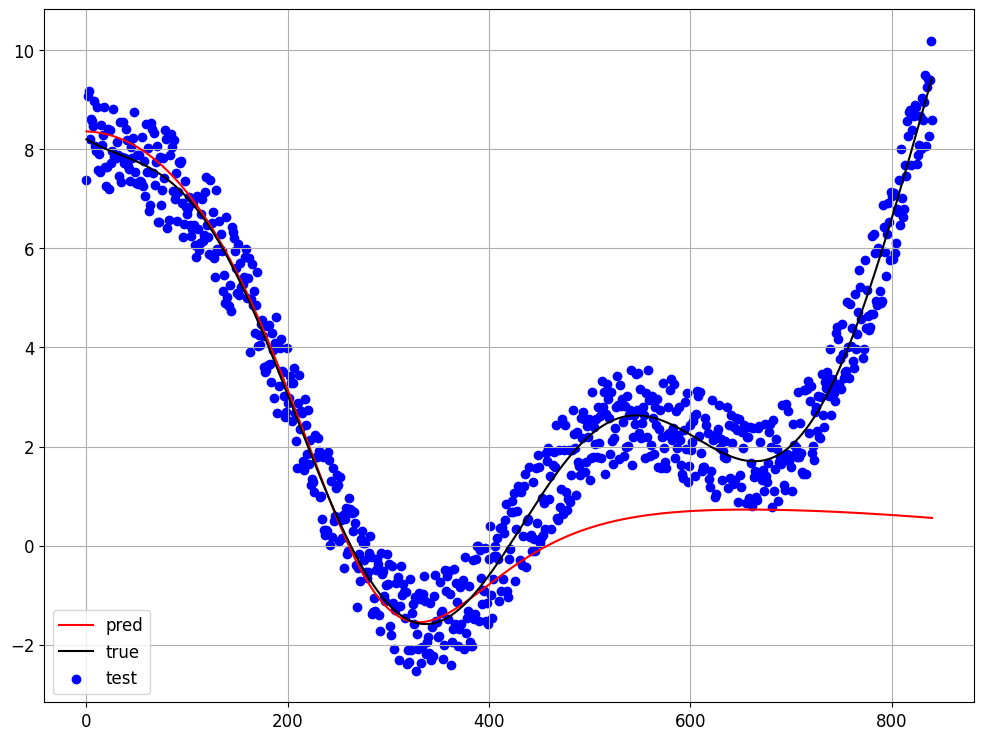

In [18]:
ax = res_df.pred.plot(c ='r', label = 'pred')

res_df.true.plot(c = 'k', ax = ax, label = 'true');

plt.scatter(res_df.index, res_df.test, c = 'b', label = 'test')

plt.grid()

plt.legend();

## Option II

In [19]:
del model

In [20]:
num_features = 1

model = tf.keras.Sequential()

model.add ( tf.keras.layers.Dense(128, activation = 'tanh', input_shape = (num_features,) ) )

model.add ( tf.keras.layers.Dense(64, activation = 'tanh' ) )


model.add( tf.keras.layers.Dense(1) )

model.compile (optimizer='adam', loss = 'mse')

model.fit (X_train, y_train,
          validation_data=[X_test, y_test],
          batch_size = BATCH_SIZE,
          epochs=EPOCHS,
          verbose = 2)

Epoch 1/100
64/64 - 0s - loss: 7.7750 - val_loss: 37.4001 - 241ms/epoch - 4ms/step
Epoch 2/100
64/64 - 0s - loss: 1.9720 - val_loss: 74.5986 - 58ms/epoch - 905us/step
Epoch 3/100
64/64 - 0s - loss: 1.3613 - val_loss: 72.1927 - 59ms/epoch - 920us/step
Epoch 4/100
64/64 - 0s - loss: 1.3480 - val_loss: 73.5668 - 58ms/epoch - 912us/step
Epoch 5/100
64/64 - 0s - loss: 1.3420 - val_loss: 74.3823 - 59ms/epoch - 915us/step
Epoch 6/100
64/64 - 0s - loss: 1.3345 - val_loss: 73.2520 - 59ms/epoch - 918us/step
Epoch 7/100
64/64 - 0s - loss: 1.3224 - val_loss: 74.8217 - 59ms/epoch - 922us/step
Epoch 8/100
64/64 - 0s - loss: 1.3110 - val_loss: 74.2703 - 59ms/epoch - 916us/step
Epoch 9/100
64/64 - 0s - loss: 1.2988 - val_loss: 73.5310 - 59ms/epoch - 921us/step
Epoch 10/100
64/64 - 0s - loss: 1.2753 - val_loss: 72.9265 - 58ms/epoch - 903us/step
Epoch 11/100
64/64 - 0s - loss: 1.2407 - val_loss: 70.9066 - 57ms/epoch - 895us/step
Epoch 12/100
64/64 - 0s - loss: 1.1693 - val_loss: 65.3004 - 59ms/epoch - 9

Epoch 99/100
64/64 - 0s - loss: 0.3513 - val_loss: 4.0062 - 60ms/epoch - 936us/step
Epoch 100/100
64/64 - 0s - loss: 0.3484 - val_loss: 4.2956 - 76ms/epoch - 1ms/step


27/27 [==============================] - 0s 533us/step


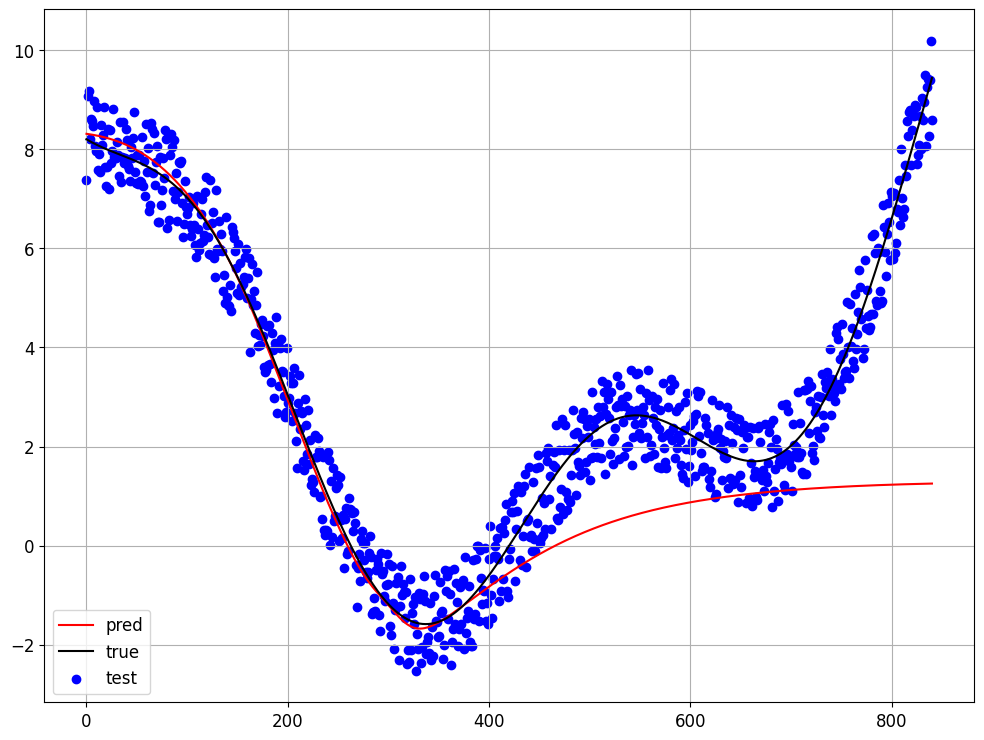

In [21]:
y_pred = model.predict(X_test)

res_df = pd.DataFrame({'pred': y_pred[:, 0], 'test' : y_test})

res_df['true'] = y_true_test

ax = res_df.pred.plot(c ='r', label = 'pred')

res_df.true.plot(c = 'k', ax = ax, label = 'true');

plt.scatter(res_df.index, res_df.test, c = 'b', label = 'test')

plt.grid()

plt.legend();

In [ ]:
num_features = 1

initializer = tf.keras.initializers.HeNormal(seed = RANDOM_STATE)

model = tf.keras.Sequential()

model.add ( tf.keras.layers.Dense(128, activation = 'swish', 
                                  kernel_initializer = initializer,
                                  input_shape = (num_features,) ) )

model.add ( tf.keras.layers.Dense(64, activation = 'swish',
                                  kernel_initializer = initializer) )


model.add( tf.keras.layers.Dense(1) )

model.compile (optimizer='adam', loss = 'mse')

model.fit (X_train, y_train,
          validation_data=[X_test, y_test],
          batch_size = BATCH_SIZE,
          epochs=EPOCHS,
          verbose = 2)

Epoch 1/100
64/64 - 0s - loss: 3.8153 - val_loss: 1.3611 - 373ms/epoch - 6ms/step
Epoch 2/100
64/64 - 0s - loss: 0.6936 - val_loss: 2.8832 - 61ms/epoch - 948us/step
Epoch 3/100
64/64 - 0s - loss: 0.5824 - val_loss: 2.6023 - 61ms/epoch - 948us/step
Epoch 4/100
64/64 - 0s - loss: 0.4897 - val_loss: 1.5584 - 64ms/epoch - 999us/step
Epoch 5/100
64/64 - 0s - loss: 0.4406 - val_loss: 1.0480 - 69ms/epoch - 1ms/step
Epoch 6/100
64/64 - 0s - loss: 0.4110 - val_loss: 1.2333 - 65ms/epoch - 1ms/step
Epoch 7/100
64/64 - 0s - loss: 0.3934 - val_loss: 1.4721 - 63ms/epoch - 984us/step
Epoch 8/100
64/64 - 0s - loss: 0.3761 - val_loss: 1.9342 - 59ms/epoch - 922us/step
Epoch 9/100
64/64 - 0s - loss: 0.3679 - val_loss: 2.4377 - 61ms/epoch - 958us/step
Epoch 10/100
64/64 - 0s - loss: 0.3600 - val_loss: 3.0173 - 66ms/epoch - 1ms/step
Epoch 11/100
64/64 - 0s - loss: 0.3603 - val_loss: 3.6542 - 67ms/epoch - 1ms/step
Epoch 12/100
64/64 - 0s - loss: 0.3599 - val_loss: 4.1163 - 74ms/epoch - 1ms/step
Epoch 13/100

In [ ]:
y_pred = model.predict(X_test)

res_df = pd.DataFrame({'pred': y_pred[:, 0], 'test' : y_test})

res_df['true'] = y_true_test

ax = res_df.pred.plot(c ='r', label = 'pred')

res_df.true.plot(c = 'k', ax = ax, label = 'true');

plt.scatter(res_df.index, res_df.test, c = 'b', label = 'test')

plt.grid()

plt.legend();